<a href="https://colab.research.google.com/github/csonkam/OTS-egyeni/blob/main/Teszt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'numpy.ndarray'>
[[298.        ]
 [298.48456277]]
<class 'numpy.ndarray'>
[[298.48456277]
 [298.96737329]]
<class 'numpy.ndarray'>
[[298.96737329]
 [299.44843789]]
<class 'numpy.ndarray'>
[[299.44843789]
 [299.92776291]]
<class 'numpy.ndarray'>
[[299.92776291]
 [300.40535461]]
<class 'numpy.ndarray'>
[[300.40535461]
 [300.88121928]]
<class 'numpy.ndarray'>
[[300.88121928]
 [301.35536315]]
<class 'numpy.ndarray'>
[[301.35536315]
 [301.82779245]]
<class 'numpy.ndarray'>
[[301.82779245]
 [302.29851338]]
<class 'numpy.ndarray'>
[[302.29851338]
 [302.76753212]]
<class 'numpy.ndarray'>
[[302.76753212]
 [303.23485482]]
<class 'numpy.ndarray'>
[[303.23485482]
 [303.70048761]]
<class 'numpy.ndarray'>
[[303.70048761]
 [304.16443661]]
<class 'numpy.ndarray'>
[[304.16443661]
 [304.62670791]]
<class 'numpy.ndarray'>
[[304.62670791]
 [305.08730757]]
<class 'numpy.ndarray'>
[[305.08730757]
 [305.54624163]]
<class 'numpy.ndarray'>
[[305.54624163]
 [306.00351612]]
<class 'numpy.ndarray'>
[[306.0

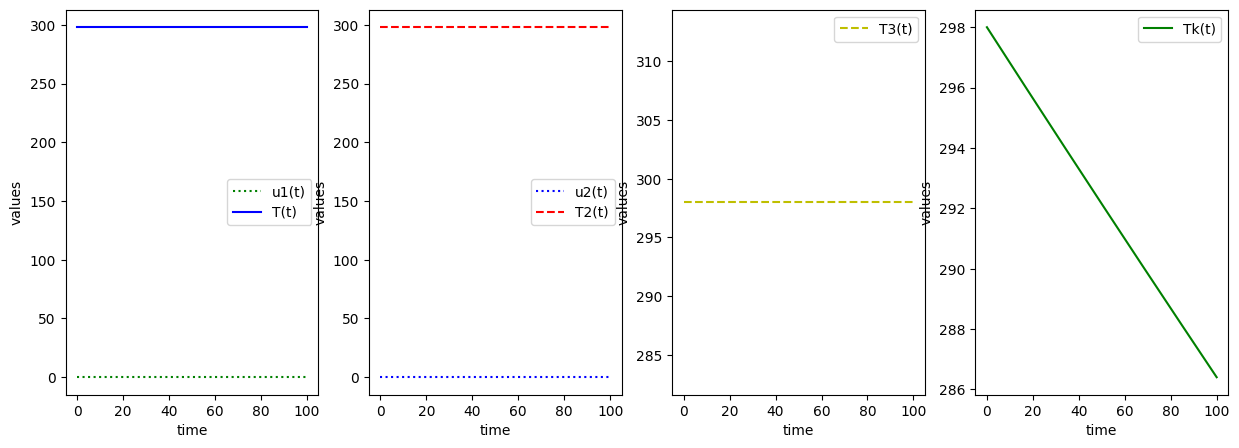

In [8]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
# Alap adatok
B=0.01/3600 #m^3/s
rho=1000 #kg/m^3
cp=4.18 #kJ/(kgK)
V=0.007 #m^3
alfa=0.1 #W/(m^2K)
A=5.3 #m^2
Tm=263 #K,-10C°
Tg=432 #K, 159C°
Tbe=298 #K
T0=298 #K
def hocserelo_modell(y0, t, u1):
    T=y0[0]
    dT_dt=(B*(u1/100)*rho*cp*(Tk[i]-T)+alfa*A*(Tm-T))/(V*rho*cp)
    #dT_dt=B*(u1/100)*rho*cp*(Tbe-T)+(alfa*A/(V*rho*cp))*(Tm-T)
    return dT_dt
def hocserelo_modell1(y1, t, u1, u2):
    T2=y1[0]
    dT2_dt=(B*((100-u1)/100)*(u2/100)*rho*cp*(Tk[i]-T2)+alfa*A*(Tg-T2))/(V*rho*cp)
    return dT2_dt
def hocserelo_modell2(y2, t, u1, u2):
    T3=y2[0]
    dT3_dt=(B*((100-u1)/100)*((100-u2)/100)*rho*cp*(Tk[i]-T3))/(V*rho*cp)
    return dT3_dt
n=501 #s időpontok
t=np.linspace(0,100,n)
z0=T0
z1=T0
z2=T0
#result=odeint(hocserelo_modell, t_span, x0, hmax=0.01)
# step input
u1 = np.zeros(n)
u2 = np.zeros(n)
u3 = np.zeros(n)
# change to 20 at time = 5.0
#u1[50:] = 10
#u1[100:]= 0
#u2[100:] = 10


# store solution
T = np.empty_like(t)
T2 = np.empty_like(t)
T3 = np.empty_like(t)
Tk = np.empty_like(t)
# record initial conditions
T[0] = z0
T2[0] = z1
T3[0]= z2
Tk[0]=T0

# solve ODE
for i in range(1,n):

    # span for next time step
    tspan = [t[i-1],t[i]]

    # solve for next step
    z = odeint(hocserelo_modell,z0,tspan,args=(u1[i],),hmax=0.1)
    z1 = odeint(hocserelo_modell1,z1,tspan,args=(u1[i],u2[i]),hmax=0.1)
    z2 = odeint(hocserelo_modell2,z2,tspan,args=(u1[i],u2[i]),hmax=0.1)
    print(type(z1))
    # calculate Tk
      #Tk[i]=(B*u1[i]/100*z[1][0]+B*((100-u1[i])/100)*u2[i]/100*z1[1][0]+B*((100-u1[i])/100)*(100-u2[i])/100*z2[1][0])/B
    Tk[i]=(B*u1[i]/100*z[1][-1]+B*((100-u1[i])/100)*u2[i]/100*z1[1][-1]+B*((100-u1[i])/100)*(100-u2[i])/100*z2[1][-1])/(B*u1[i]/100+B*((100-u1[i])/100)*u2[i]/100+B*((100-u1[i])/100)*(100-u2[i]))*100


    # store solution for plotting
    if u1[i]>0 and u2[i]>0:
      T[i] = z[1][-1]
      T2[i] = z1[1][-1]
      T3[i] = z2[1][-1]
    elif u1[i]==0 and u2[i]>0:
      T[i] = Tbe
      T2[i] = z1[1][-1]
      T3[i] = z2[1][-1]
    elif u1[i]>0 and u2[i]==0:
      T[i] = z[1][-1]
      T2[i] = Tbe
      T3[i] = z2[1][-1]
    elif u1[i]==0 and u2[i]==0:
      T[i] = Tbe
      T2[i] = Tbe
      T3[i] = Tbe

    # next initial condition
    print(z1)
    z0 = z[1][-1]
    z1 = z1[1][-1]
    z2 = z2[1][-1]


# plot results
plt.figure(figsize=(15,5))
plt.subplot(141)
plt.plot(t,u1,'g:',label='u1(t)')
plt.plot(t,T,'b-',label='T(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.subplot(142)
plt.plot(t,u2,'b:',label='u2(t)')
plt.plot(t,T2,'r--',label='T2(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.subplot(143)
plt.plot(t,T3,'y--',label='T3(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.subplot(144)
plt.plot(t,Tk,'g-',label='Tk(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

In [7]:
Tk

array([298.        , 297.97635014, 297.95270217, 297.92905607,
       297.90541184, 297.88176949, 297.85812902, 297.83449042,
       297.8108537 , 297.78721886, 297.76358589, 297.7399548 ,
       297.71632558, 297.69269824, 297.66907277, 297.64544918,
       297.62182746, 297.59820762, 297.57458965, 297.55097356,
       297.52735934, 297.50374699, 297.48013652, 297.45652792,
       297.4329212 , 297.40931635, 297.38571337, 297.36211227,
       297.33851304, 297.31491568, 297.29132019, 297.26772658,
       297.24413484, 297.22054497, 297.19695697, 297.17337085,
       297.1497866 , 297.12620422, 297.10262371, 297.07904507,
       297.0554683 , 297.03189341, 297.00832038, 296.98474923,
       296.96117995, 296.93761254, 296.91404699, 296.89048332,
       296.86692152, 296.84336159, 296.81980353, 296.79624733,
       296.77269301, 296.74914056, 296.72558997, 296.70204126,
       296.67849441, 296.65494943, 296.63140632, 296.60786508,
       296.58432571, 296.56078821, 296.53725257, 296.51